In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
iris = pd.read_csv('/content/Iris (1).csv')

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [10]:
iris['labels'] = l.fit_transform(iris['Species'])

In [11]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
iris['labels'].unique()

array([0, 1, 2])

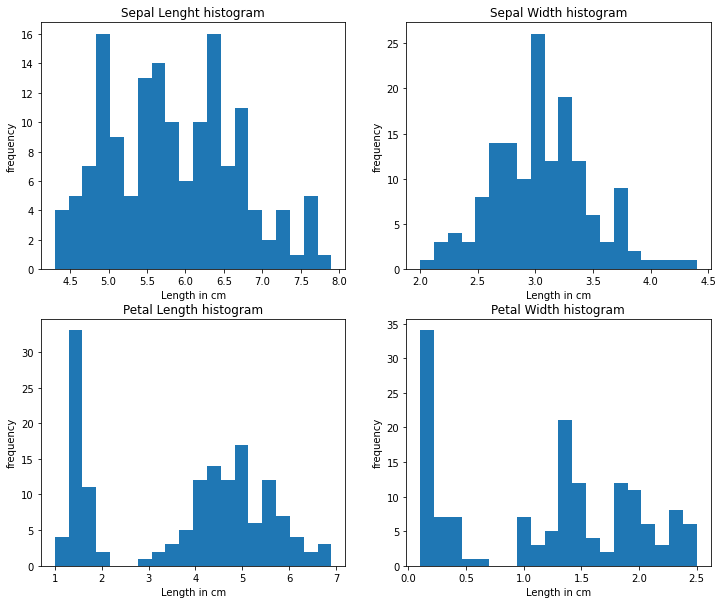

In [13]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
plt.hist(iris['SepalLengthCm'],bins = 20)
plt.title('Sepal Lenght histogram')
plt.xlabel('Length in cm')
plt.ylabel('frequency')
plt.subplot(2,2,2)
plt.hist(iris['SepalWidthCm'],bins = 20)
plt.title('Sepal Width histogram')
plt.xlabel('Length in cm')
plt.ylabel('frequency')
plt.subplot(2,2,3)
plt.hist(iris['PetalLengthCm'],bins = 20)
plt.title('Petal Length histogram')
plt.xlabel('Length in cm')
plt.ylabel('frequency')
plt.subplot(2,2,4)
plt.hist(iris['PetalWidthCm'],bins = 20)
plt.title('Petal Width histogram')
plt.xlabel('Length in cm')
plt.ylabel('frequency')
pass

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtc = DecisionTreeClassifier(min_samples_leaf=3)

In [16]:
x_train = iris[['SepalLengthCm','SepalWidthCm','PetalWidthCm','PetalLengthCm']]

In [17]:
y_train = iris['labels']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xt,xv,yt,yv = train_test_split(x_train,y_train,test_size = 0.2)

In [20]:
len(xt),len(xv)

(120, 30)

In [21]:
dtc.fit(xt,yt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
predictions = dtc.predict(xv)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(predictions,yv)

1.0

In [25]:
dtc = DecisionTreeClassifier(min_samples_leaf=1)
dtc.fit(xt,yt)
predictions = dtc.predict(xv)
accuracy_score(predictions,yv)

0.9666666666666667

In [26]:
dtc = DecisionTreeClassifier(min_samples_leaf=7)
dtc.fit(xt,yt)
predictions = dtc.predict(xv)
accuracy_score(predictions,yv)

0.9333333333333333

In [27]:
new_data = [4.7,3,1.5,0.2]
new_data = np.reshape(new_data,(1,-1))
predict = dtc.predict(new_data)
if predict == 0:
  print('Iris-setosa')
elif predict==1:
  print('Iris-versicolor')
else:
  print('Iris-virginica')  

Iris-versicolor


In [29]:
dtc = DecisionTreeClassifier(min_samples_leaf=3)
dtc.fit(xt,yt)
predictions = dtc.predict(xv)
accuracy_score(predictions,yv)

1.0

In [34]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'labels'],
      dtype='object')

In [35]:
col = ['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

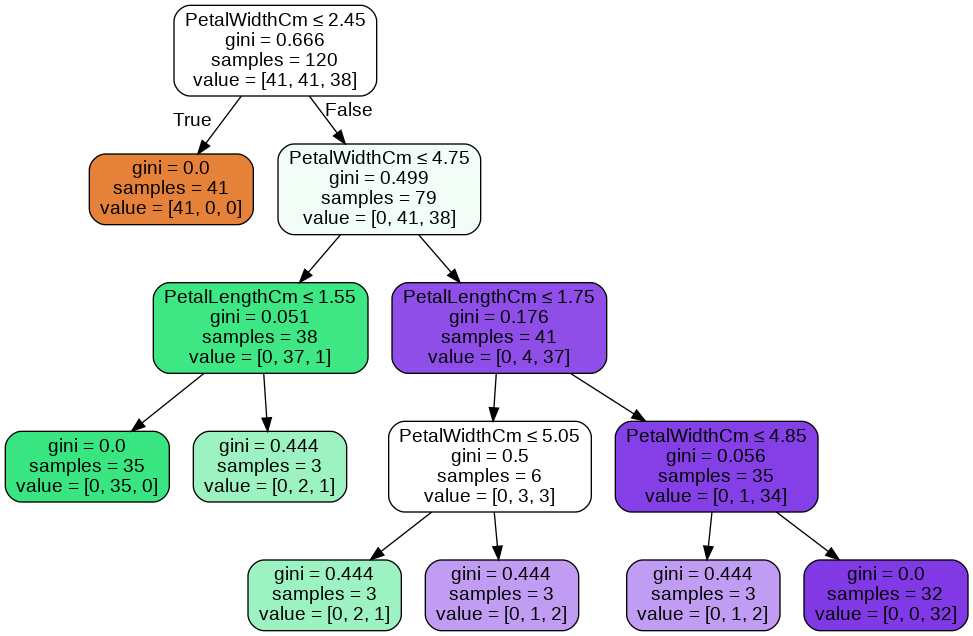

In [36]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=col,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())